In this project we are trying an EDA, using an HR Database.
The database can be found on https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?resource=download

We will try to gather a number of insights and answer some questions regarding the reasons employees leaving the company

The dataset includes columns

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load dataset

In [4]:
data=pd.read_csv('HR_comma_sep.csv')

In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Basic Info about the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Rename columns to ease our job

In [9]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
data.columns=map(str.lower,data.columns)

In [11]:
data=data.rename(columns={'average_montly_hours':'average_monthly_hours', 'time_spend_company':'tenure'})

In [12]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Basic Data Cleaning

In [14]:
#check for missing values
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [15]:
#check for duplicates
data.duplicated().sum()

3008

In [16]:
data[data.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


Observing the duplicated entries, seems impossible for them to be valid entries. So we can proceed dropping them 

In [17]:
df=data.drop_duplicates(keep='first')
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check for outliers in data

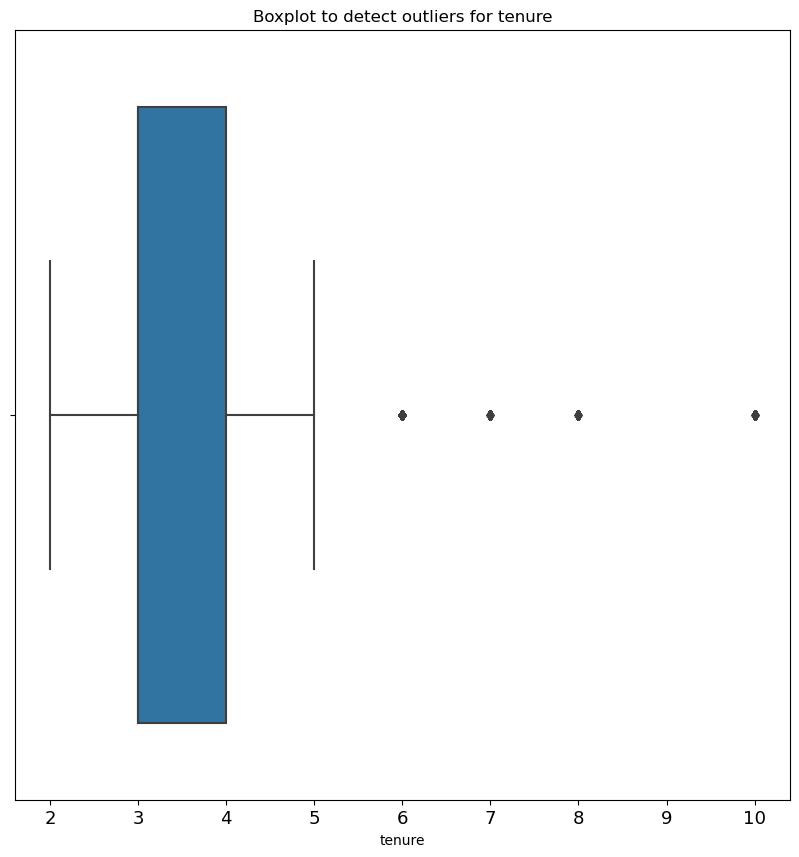

In [20]:
plt.figure(figsize=(10,10))
plt.title('Boxplot to detect outliers for tenure')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.boxplot(x=df['tenure'])
plt.show()

We check for outliers in tenure as we can easily observe that this category is more sensitive to extreme values than others

Now it would be useful to check the number of outliers to compare with the number of entries, so we can determine if they can affect our results

In [22]:
#25th percentile of the distribution

perc25=df['tenure'].quantile(0.25)

perc75=df['tenure'].quantile(0.75)

iqr=perc75-perc25

lower=perc25-1.5*iqr
upper=perc75+1.5*iqr

print('lower limit:', lower)
print('upper limit:', upper)

outliers=df[(df['tenure']>upper) | (df['tenure']<lower)]

print('Number of entries containing outliers in `tenure`:', len(outliers))

lower limit: 1.5
upper limit: 5.5
Number of entries containing outliers in `tenure`: 824


Seems that outliers in tenure are only a fraction of total entries. Although, depending in the model that may be used for predictions those outliers may have to be removed

### Determine the number of people left/stayed

In [24]:
print(df['left'].value_counts())

#percentage of people left/stayed

print(df['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


#### Now we try to gather some insights about the reasons people leaving the company, by creating a number of visualizations

#### Firstly, we are going to examine the realtion between the average monthly hours and the number of projects an employee worked, regarding the fact of them leaving or staying

<Axes: xlabel='average_monthly_hours', ylabel='number_project'>

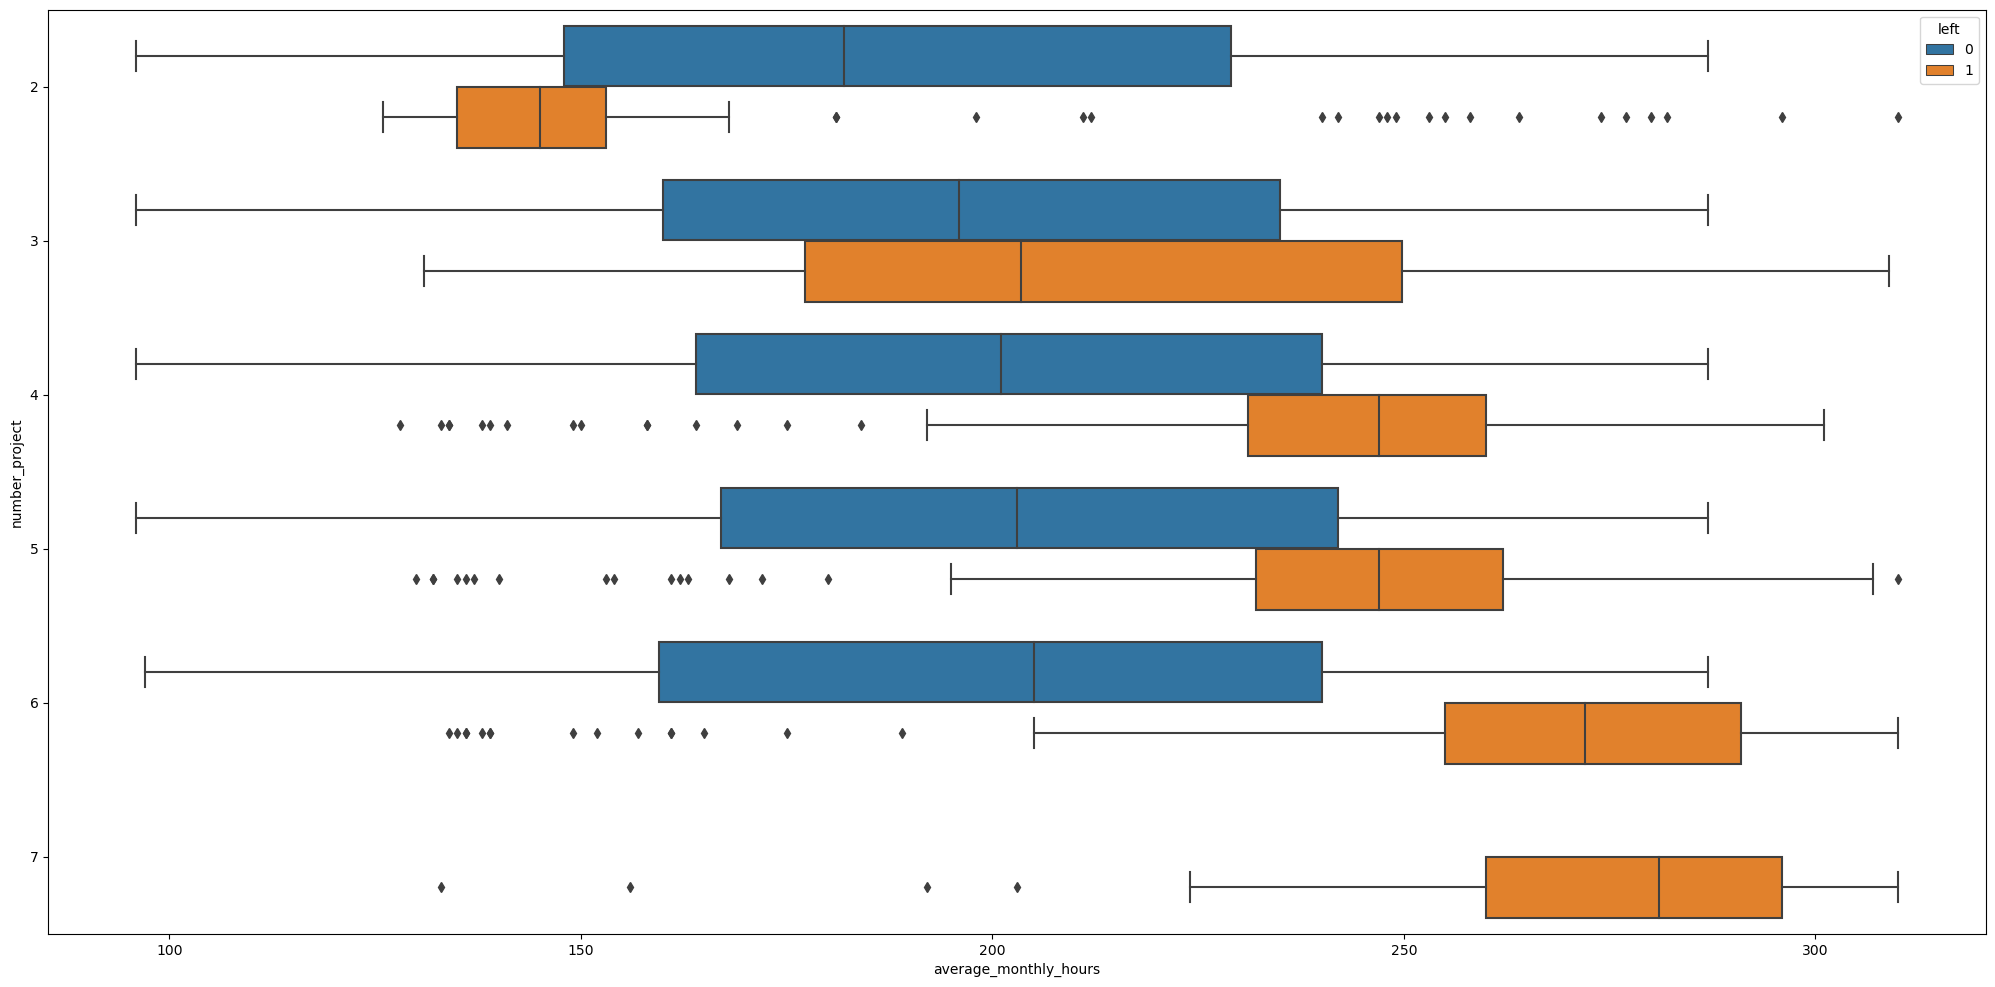

In [28]:
plt.figure(figsize=(25,12))
sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left',orient='h')

<Axes: xlabel='number_project', ylabel='Count'>

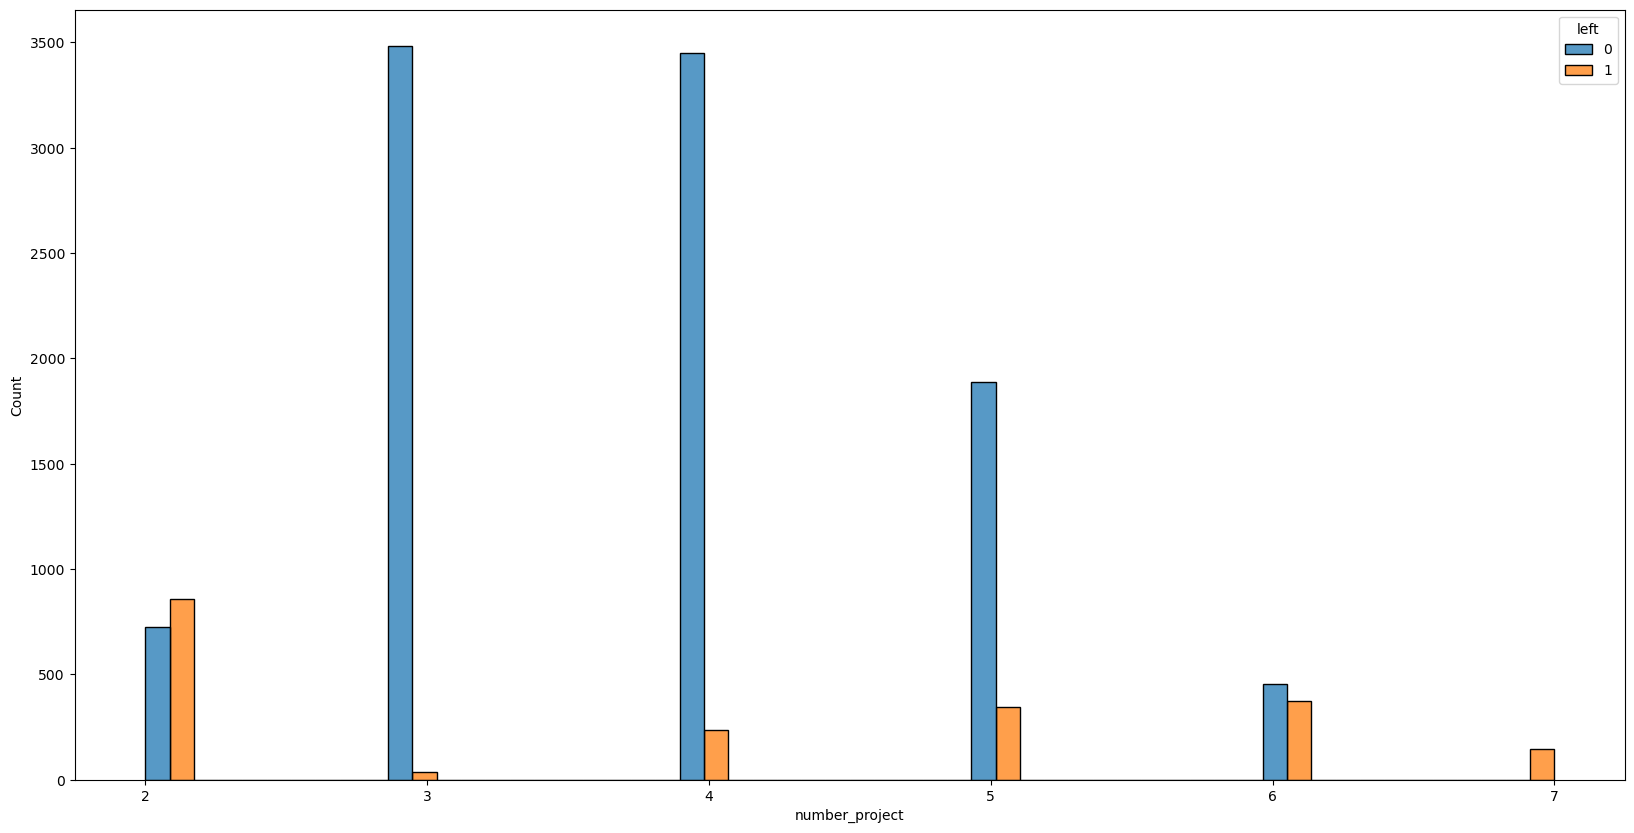

In [29]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge')

It is natural that people working on many projects to be working longer hours too and this is definetely stated one these graphs.

Also we can observe a number of insights

- Regarding people leaving the company we can easily observe two groups. People working on multiple projects, but working less hpurs than their peers, and employees that work much more.

- As we can see, people that worked on the largest number of projects, they all decided to leave the company. 
 
- We may can say that the first group didn't work as much, because they were fired of poor performance or other reasons, or they were already leaving the company.

- For the employees that worked much and work on many projects, we may assume that they quit, because of the long hours and heavy duties.

- Everyone with 7 project seem to leave the company as also people with 6 projects. 

- Also we observe people with only two projects leaving, so we can assume that they were maybe fired of poor performance. 

- The golden ratio seems to be 3-4 projects and employees working 150-225 hours approximately.

- If we assume that normal working hours are 40 per week, -> 50 weeks* 40 hours per week/ 12 months = 166.67 hours per month.

On this company it seems certain that people are overworked.

#### Let's try to examine the average monthly hours against the satisfaction levels

Text(0.5, 1.0, 'Monthly hours by satisfaction score')

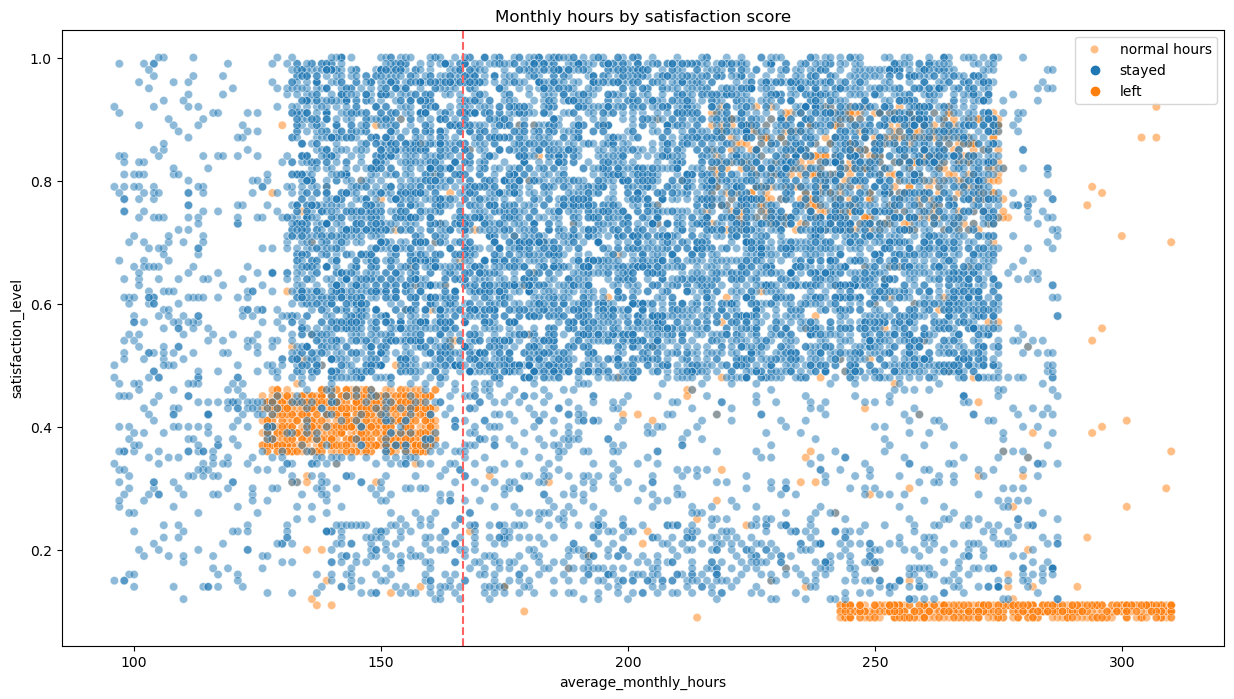

In [34]:
plt.figure(figsize=(15,8))
sns.scatterplot(df,x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
basic_hours_per_month=(50*40)/12
plt.axvline(x=basic_hours_per_month, color='#ff6361', label='normal hours/month', ls='--')
plt.legend(labels=['normal hours', 'stayed', 'left'])
plt.title('Monthly hours by satisfaction score')

In this scatterplot seems clear that there are people that worked way more than normal. For this group we can observe that their satiscation levels were close to zero and seens completely normal that they left the company.

Also there is a group of people that worked less than normal hours, but their satisfaction level remained low and they quit their jobs. It is difficult to speculate about the reason they left.

It's worth mentioning, that there are a lot of irregularities in the distribution of the data. People with high satisfaction levels that worked way more than usual. Also, people quiting their jobs, while having a very high satisfaction level.

It is possible that the data is synthetic and random.

For model construction we must be very careful, as we may need to normalize the data and remove such types of employee groups, as they will skew our results.


#### Let's examine satisfaction levels by tenure

Text(0.5, 1.0, 'Satisfaction by tenure')

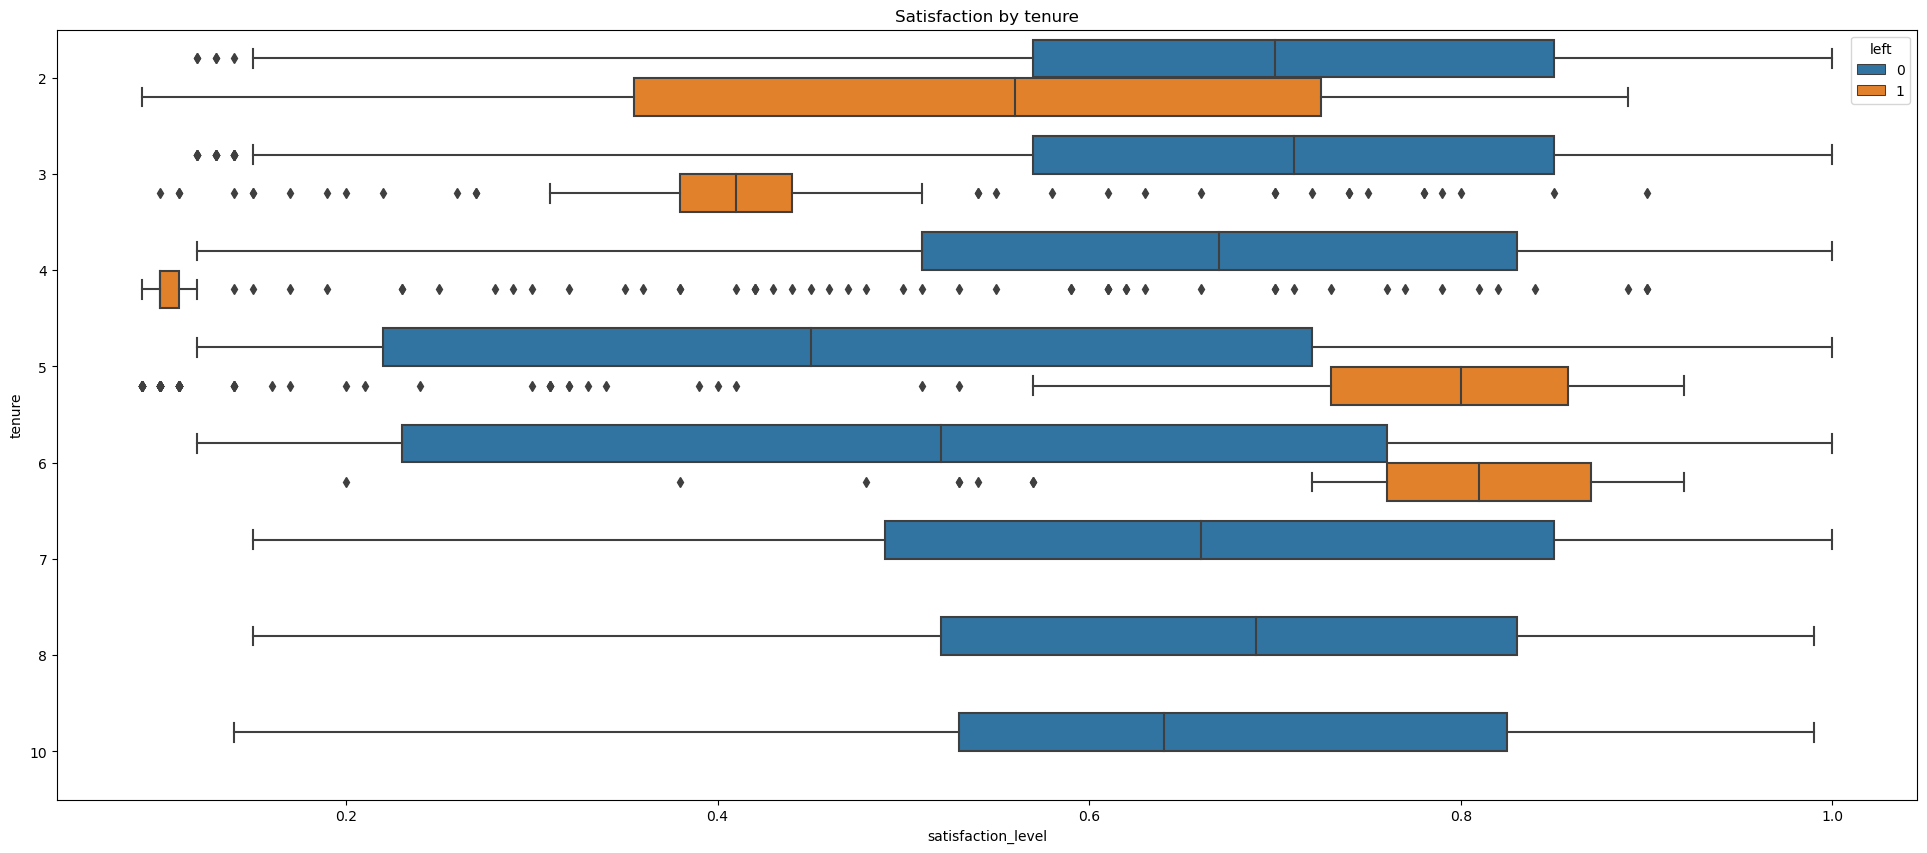

In [41]:
plt.figure(figsize=(24,10))

sns.boxplot(df, x='satisfaction_level', y='tenure', hue='left', orient='h')
plt.title('Satisfaction by tenure')

Text(0.5, 1.0, 'Tenure')

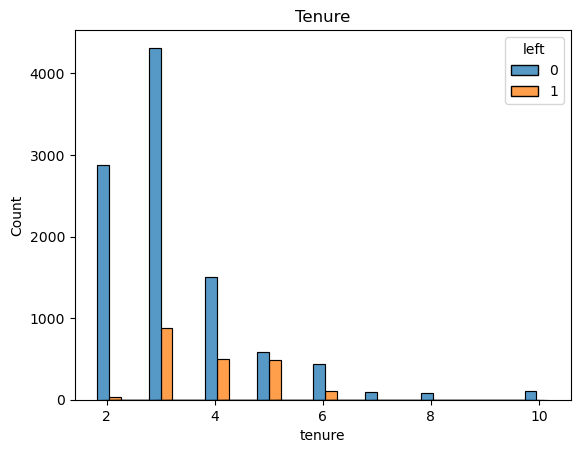

In [40]:
tenure_stay = df[df['left']==0]['tenure']
tenure_left = df[df['left']==1]['tenure']
sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=5)
plt.title('Tenure')

- We can see that people with longer tenures don't leave the company

- Also, people with medium to long tenures seem to be more satisfied with the company 

- Four year employees who left have an unusually low satisfaction level, in this case a further analysis is required.

- The histogram also shows, that longer tenure employees are a few, regarding the whole amount of employees.


#### Let's compare the mean and median satisfaction scores of people who left/stayed

In [45]:
df.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


The result is as expected. People that left tend to have a lower satisfaction level than the people that stayed.



#### Now let's examine the relationship between tenure and salaries

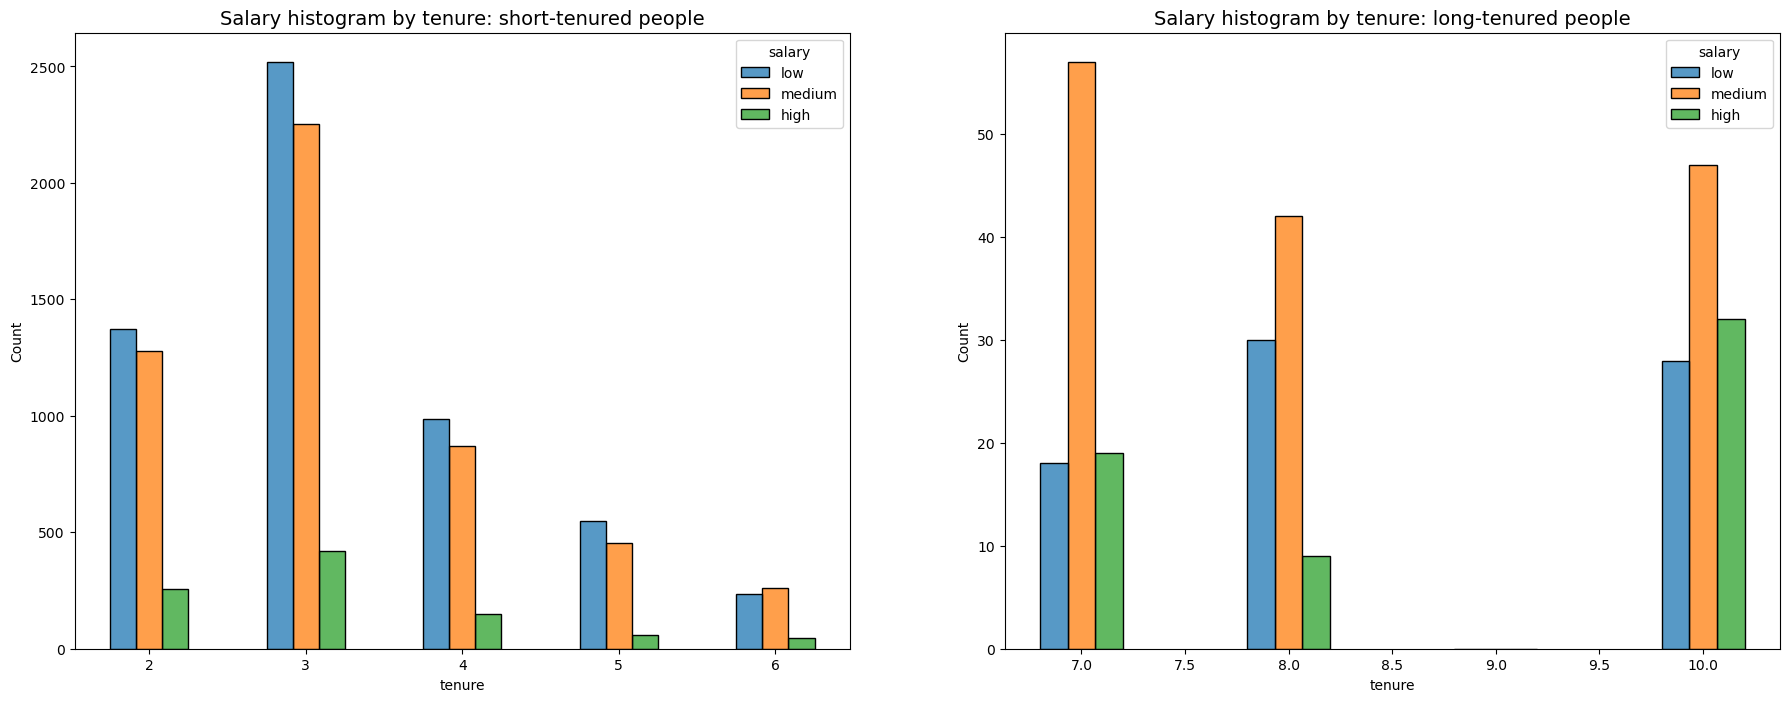

In [49]:

fig, ax = plt.subplots(1, 2, figsize = (22,8))


tenure_short = df[df['tenure'] < 7]


tenure_long = df[df['tenure'] > 6]


sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')


sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')

We can observe that long-tenured employees don't necessarelly have higher salaries. That means that the previous satisfaction levels can be related to other factors and not only on higher salaries, because of the years stayed.

#### Now, it would be useful to check how the company feels about the employees. We are going to examine how evaluation scores are affected by the working hours and how evaluation scores affect employees leaving the company.


Text(0.5, 1.0, 'Monthly hours by last evaluation score')

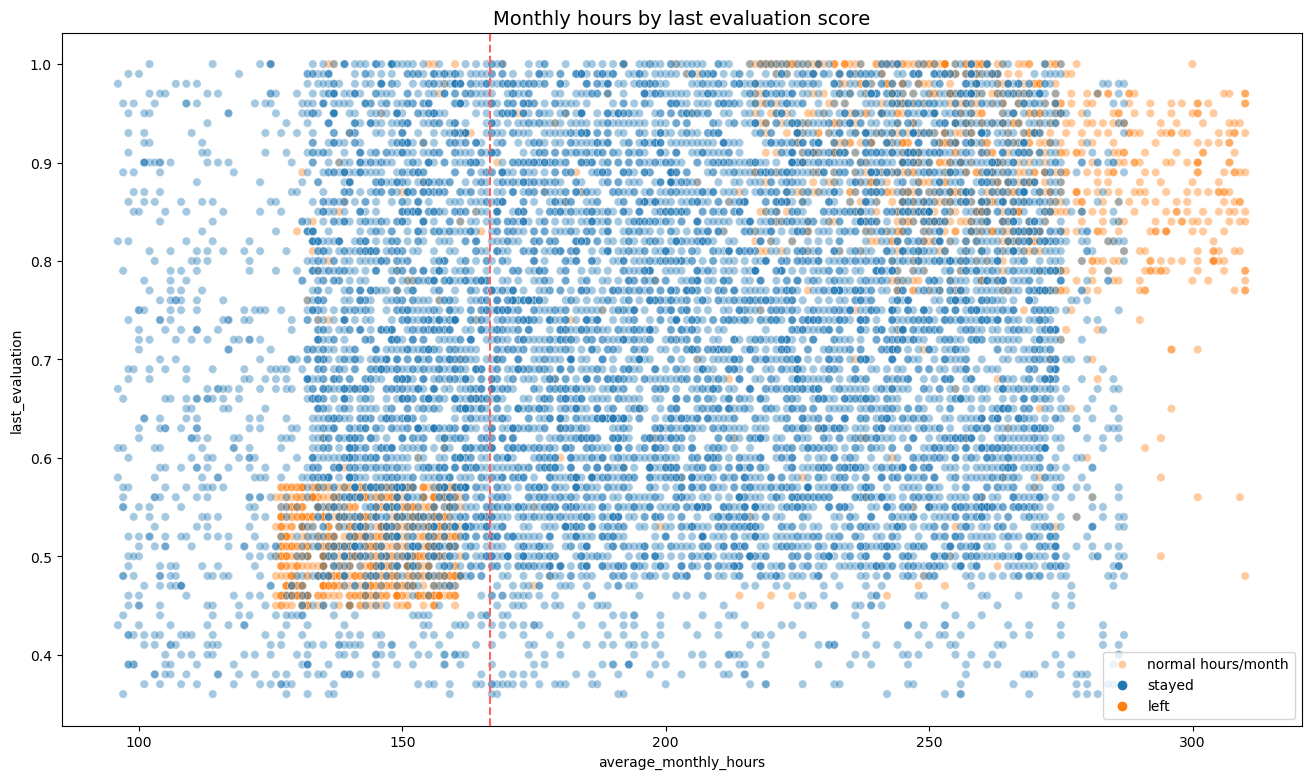

In [54]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=basic_hours_per_month, color='#ff6361', label='normal hours/month', ls='--')
plt.legend(labels=['normal hours/month', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

- It seems that there is a correlation between hours worked and evaluation score
- By looking on the upper left of the scatterplot, there are not much employees that worked less than normal hours and have a high evaluation, but also we can observe that working long hours doesn't guarantee a good feedback by the company
- It seems that working long hours is appreciated by the company in general, and long working hours employees seem to be efficient.

#### It would be useful to check if working long hours can affect the promotions 

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

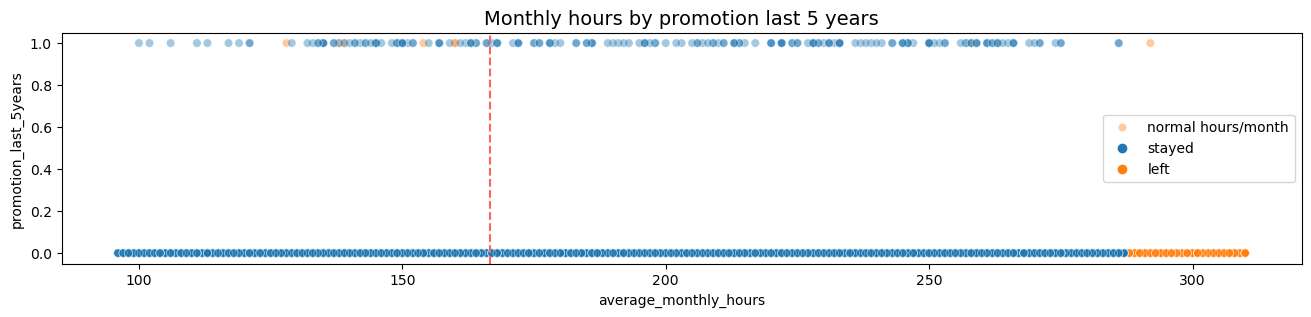

In [61]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=basic_hours_per_month, color='#ff6361', ls='--')
plt.legend(labels=['normal hours/month', 'stayed', 'left'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')

- We can see that very few employees that received a promotion left

- Working long hours doesn't guarantee a promotion at all

- Employees that work very long hours tend to leave

#### Now let's compare the salaries relationship with the people leaving the company

Text(0.5, 1.0, 'Salary distribution')

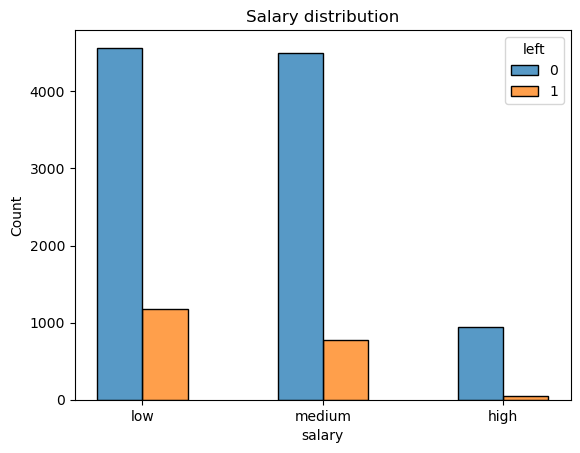

In [67]:
sns.histplot(df, x='salary', hue='left', multiple='dodge', discrete=1, shrink=0.5)
plt.title('Salary distribution')

We can observe that people with higher salaries tend to stay in the company 

<Axes: xlabel='salary', ylabel='average_monthly_hours'>

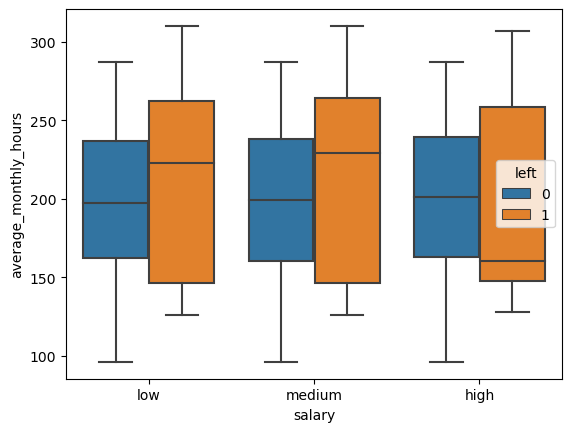

In [82]:
sns.boxplot(df, x='salary', y='average_monthly_hours', hue='left')

We can observe that salaries aren't generally affected by salary categories. Although, it is shown again that salary affects the fact of people leaving the company.

Especially, for high salaries seems to be the most serious reason for leaving.

#### Next we investigate employees leaving based on their department

In [85]:
df['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

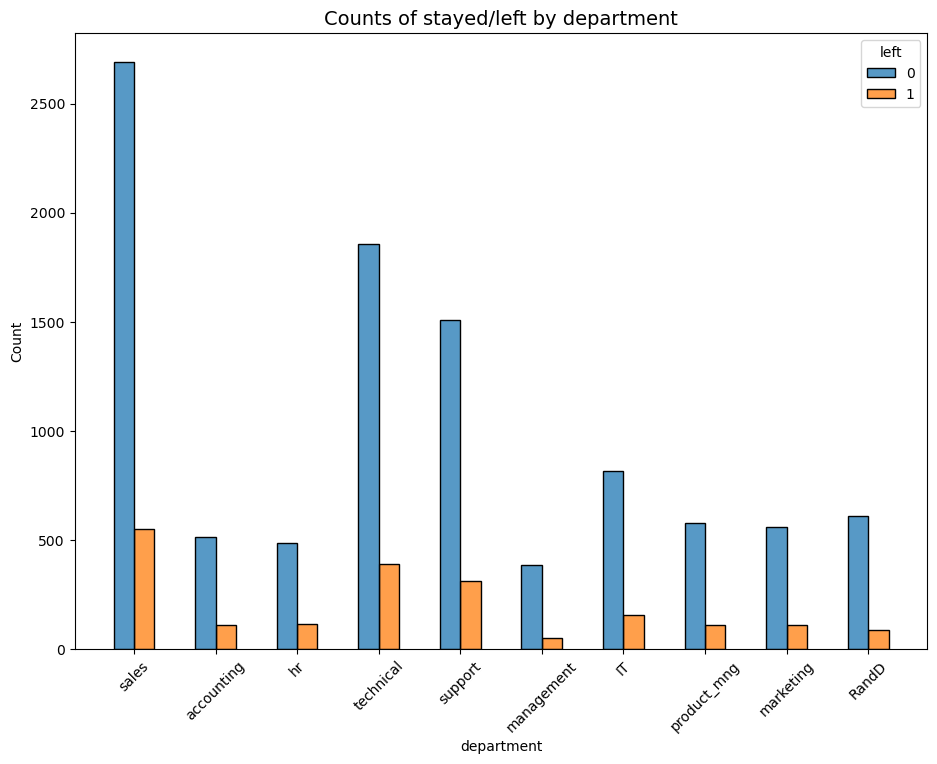

In [88]:
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=0.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

In [100]:
left_by_department = df.groupby(['department', 'left']).size()
normalized_left_by_department = left_by_department.groupby(level=0).apply(lambda x: x / x.sum())

print(normalized_left_by_department)

department   department   left
IT           IT           0       0.838115
                          1       0.161885
RandD        RandD        0       0.877522
                          1       0.122478
accounting   accounting   0       0.824477
                          1       0.175523
hr           hr           0       0.811980
                          1       0.188020
management   management   0       0.880734
                          1       0.119266
marketing    marketing    0       0.833581
                          1       0.166419
product_mng  product_mng  0       0.839650
                          1       0.160350
sales        sales        0       0.830195
                          1       0.169805
support      support      0       0.828666
                          1       0.171334
technical    technical    0       0.826203
                          1       0.173797
dtype: float64


It doesn't seem to be any department that has any significant difference in proportion of employees left or stayed.

Text(0.5, 1.0, 'Correlation Heatmap')

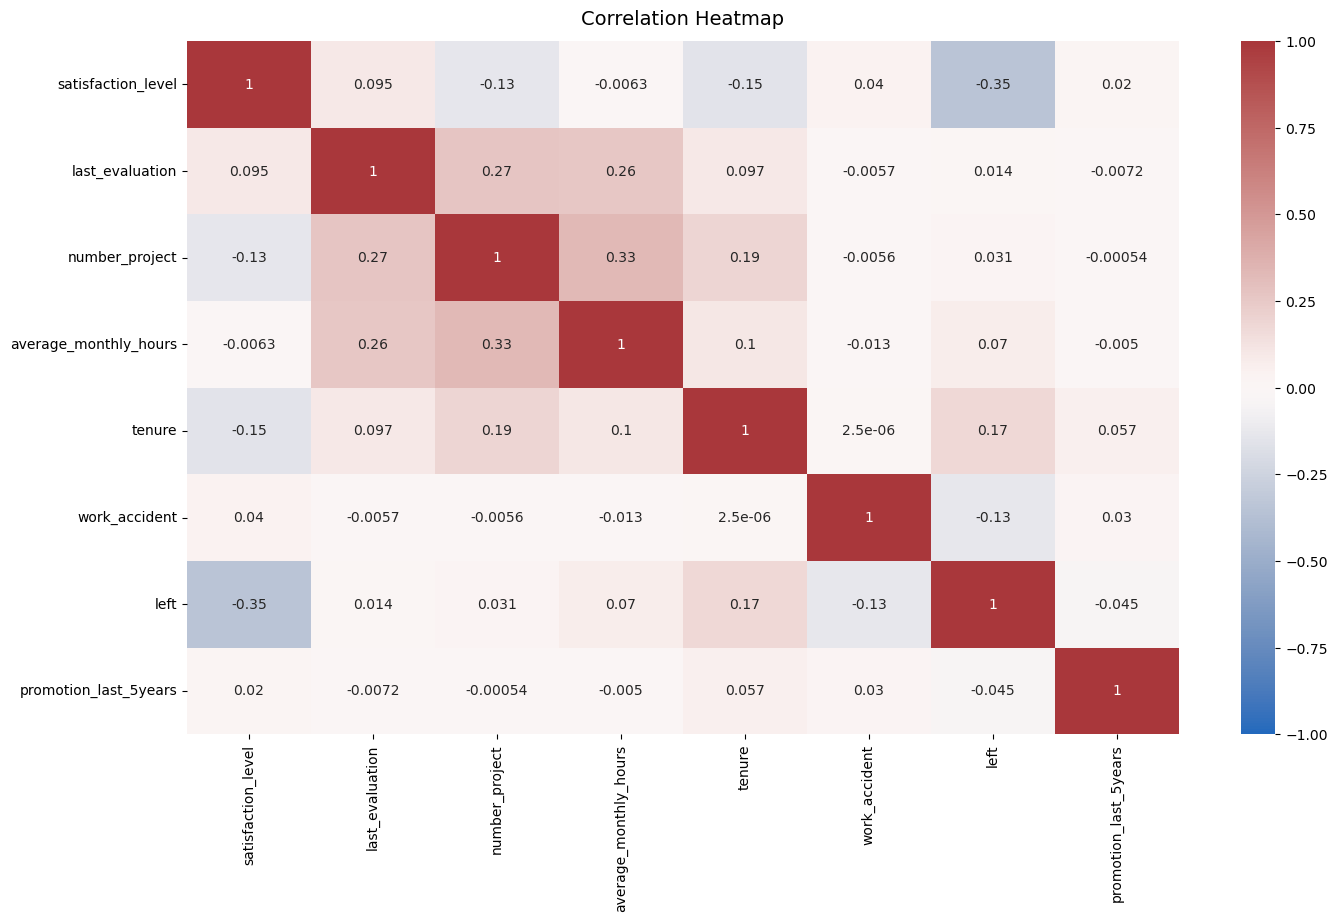

In [103]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

Correlation heatmap confirms that all the heavy burden of long hours, number of projects, and of course evaluation scores have a positive corellation with each other. 

Also there is a strong negative correlation between satisfaction levels and people leaving the company, meaning that the lower the satisfaction level the most probable for someone to leave.


### General Insights

People leaving the company seemingly because of poor management. People seem to have a lot of working burden and low satisfaction levels.

From the company's perspective, an employee working a lot seems not to mean a lot. Not many promotions or evaluation scores. 

It is also stated clearly, that there is a threshold and people that spent more than six years in the company, tend not to leave.